In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', None)
%matplotlib inline
color = sns.color_palette()

In [2]:
df_1 = pd.read_excel('Retail_Data.xlsx', sheet_name='Year 2009-2010')

<ipython-input-2-937d426259c2>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  df_1 = pd.read_excel('Retail_Data.xlsx', sheet_name='Year 2009-2010')


In [3]:
df_2 = pd.read_excel('Retail_Data.xlsx', sheet_name='Year 2010-2011')

<ipython-input-3-a77444464c41>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  df_2 = pd.read_excel('Retail_Data.xlsx', sheet_name='Year 2010-2011')


In [4]:
df = df_1.append(df_2)

In [5]:
print(df_1.shape)
print(df_2.shape)
print(df.shape)

(525461, 8)
(541910, 8)
(1067371, 8)


In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


## First we will begin exploring the variables

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


#### Categorical Features (Nominal) : Invoice , Stock Code, Country, Description , CustomerID
#### Numeric Features : Price, Quantity , InvoiceDate (date time)

In [8]:
#now let us check see the unique products, Customers and transactions
print("Products: "+str(len(df['StockCode'].value_counts())))
print("Transactions: "+str(len(df['Invoice'].value_counts())))
print("Customers: "+str(len(df['Customer ID'].value_counts())))

Products: 5305
Transactions: 53628
Customers: 5942


In [ ]:
#now let us look at the number of products purchased per transaction
temp = df.groupby(by=['Customer ID', 'Invoice'], as_index=False)['InvoiceDate'].count()
products_per_transaction = temp.rename(columns = {'InvoiceDate':'Number of products'})
products_per_transaction[:100].sort_values('Customer ID')

In [10]:
#what can be observed from here is that there are some transactions with C 
#in the beginning of the Invoice. Since the invoice was only a 6 digit number until now,
#but with the C it must mean the transaction was cancelled for some reason

#alse we can see there are customers who purchased only one product

#and there were customers who purchased many products quite frequently



In [11]:
type(products_per_transaction['Invoice'][50])

int

### Order Cancellation analysis

In [12]:
#now let us look at the transactions w.r.t the cancelled orders
products_per_transaction['Invoice'] = products_per_transaction['Invoice'].apply(lambda X:str(X))
products_per_transaction['cancelled_order'] = products_per_transaction['Invoice'].apply(lambda X:int('C' in X))
display(products_per_transaction[:15])

a = products_per_transaction['cancelled_order'].sum()
b = products_per_transaction['cancelled_order'].shape[0]
print('Number of orders cancelled: {}/{} ({:.2f}%) '.format(a, b, a/b*100))

,Customer ID,Invoice,Number of products,cancelled_order
0,12346.00,491725,1,0
1,12346.00,491742,1,0
2,12346.00,491744,1,0
3,12346.00,492718,1,0
4,12346.00,492722,1,0
5,12346.00,493410,1,0
6,12346.00,493412,1,0
7,12346.00,494450,1,0
8,12346.00,495295,1,0
9,12346.00,499763,5,0


Number of orders cancelled: 7901/44876 (17.61%) 


In [13]:
#17% of orders were cancelled, let us seek if there is any relations between the cancelled orders 

In [14]:
display(df.sort_values('Customer ID')[:15])


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
253035,513774,22690,DOORMAT HOME SWEET HOME BLUE,1,2010-06-28 13:53:00,7.49,12346.00,United Kingdom
371779,C525274,TEST001,This is a test product.,-1,2010-10-04 16:33:00,4.50,12346.00,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.00,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.00,United Kingdom
255595,C514024,M,Manual,-1,2010-06-30 11:22:00,142.31,12346.00,United Kingdom
255594,C514024,M,Manual,-1,2010-06-30 11:22:00,31.78,12346.00,United Kingdom
255593,C514024,M,Manual,-4,2010-06-30 11:22:00,13.22,12346.00,United Kingdom
370048,C525099,D,Discount,-1,2010-10-04 09:54:00,1.00,12346.00,United Kingdom
107804,499763,15056P,EDWARDIAN PARASOL PINK,1,2010-03-02 13:08:00,5.95,12346.00,United Kingdom
255592,C514024,M,Manual,-1,2010-06-30 11:22:00,1.15,12346.00,United Kingdom


In [15]:
#in many of these orders for example in the 3rd and 4th rows,
#everything is the same except for the quantity, Invoice (4th has C i.e. Cancelled) and time in the Invoice date
#this might explain the negative quantities

### We must remove cancelled orders now 

In [ ]:
x=df.loc[(df['Description'] == 'Discount')& (df['Quantity'] < 0)]
print('No of orders that had discount and had negative quantity: '+ str(len(x)))
print(x)

In [17]:
#creating a copy of our dataset which would have been cleaned from duplicate cancelled orders
clean_df = df.copy(deep = True)


In [18]:
clean_df = clean_df.loc[(clean_df['Quantity'] > 0)]

In [19]:
clean_df = clean_df.loc[(clean_df['Price'] >= 0)]

In [20]:
clean_df.shape

(1044416, 8)

In [21]:
# Creating a column to view the total price of every purchase
clean_df['Total_Price'] = clean_df['Price'] * (clean_df['Quantity'])

In [22]:
#Since every row of the dataframe indicates prizes for a single kind of product. Hence, orders are split on several lines.
#Lets us collect all the purchases made during a single order to recover the total order prize:

In [23]:
#grouping orders by Customer_ID and InvoiceNo 
temp = clean_df.groupby(by=['Customer ID', 'Invoice'], as_index=False)['Total_Price'].sum()
cart_price = temp.rename(columns = {'Total_Price':'Cart Price'})

#grouping by Customer ID and invoice and Locating orders made on the same timestamp
clean_df['InvoiceDate_int'] = clean_df['InvoiceDate'].astype('int64')
temp = clean_df.groupby(by=['Customer ID', 'Invoice'], as_index=False)['InvoiceDate_int'].mean()
clean_df.drop('InvoiceDate_int', axis = 1, inplace = True)
cart_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])

#visualizing orders and the total 
car_price = cart_price[cart_price['Cart Price'] > 0]
cart_price.sort_values('Customer ID')[:20]

,Customer ID,Invoice,Cart Price,InvoiceDate
0,12346.00,491725,45.00,2009-12-14 08:34:00.000000000
1,12346.00,491742,22.50,2009-12-14 11:00:00.000000000
2,12346.00,491744,22.50,2009-12-14 11:02:00.000000000
3,12346.00,492718,22.50,2009-12-18 10:47:00.000000000
4,12346.00,492722,1.00,2009-12-18 10:55:00.000000000
5,12346.00,493410,22.50,2010-01-04 09:24:00.000000000
6,12346.00,493412,22.50,2010-01-04 09:53:00.000000000
7,12346.00,494450,22.50,2010-01-14 13:50:00.000000000
8,12346.00,495295,22.50,2010-01-22 13:30:00.000000000
9,12346.00,499763,27.05,2010-03-02 13:08:00.000000000


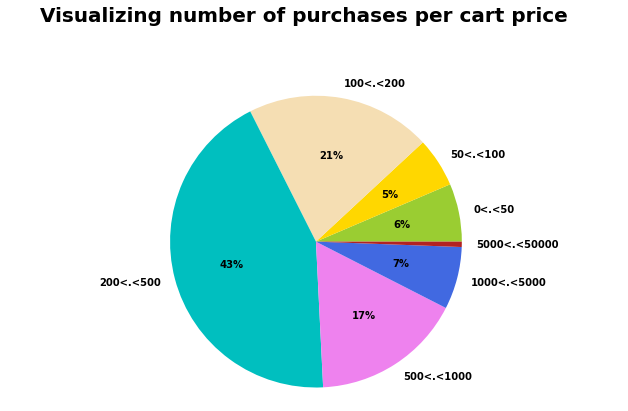

In [24]:
#distribution of orders with respect to the total order amount
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = cart_price[(cart_price['Cart Price'] < price) &
                       (cart_price['Cart Price'] > price_range[i-1])]['Cart Price'].count()
    count_price.append(val)

# Visualizing number of purchases per Cart price       
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Visualizing number of purchases per cart price", ha='center', fontsize =20);

##### As we can clearly see that 43% of the total purchases have a total cart price in between 200 and 500 currency and around 60% of the total orders have a total cart price more than 200 currency 

##  Distribution of orders for different Customers

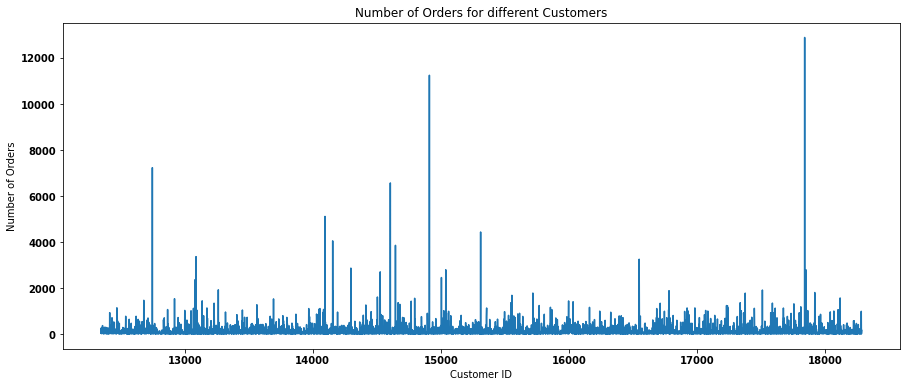

In [25]:
orders = clean_df.groupby(by=['Customer ID'], as_index=False)['Invoice'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders['Customer ID'], orders['Invoice'])
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [26]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='Invoice', ascending=False).head()

The TOP 5 customers with most number of orders...


,Customer ID,Invoice
5436,17841.00,12890
2541,14911.00,11247
400,12748.00,7230
2239,14606.00,6566
1732,14096.00,5111


## Exploring Patterns for Each country

#### grouping orders by country

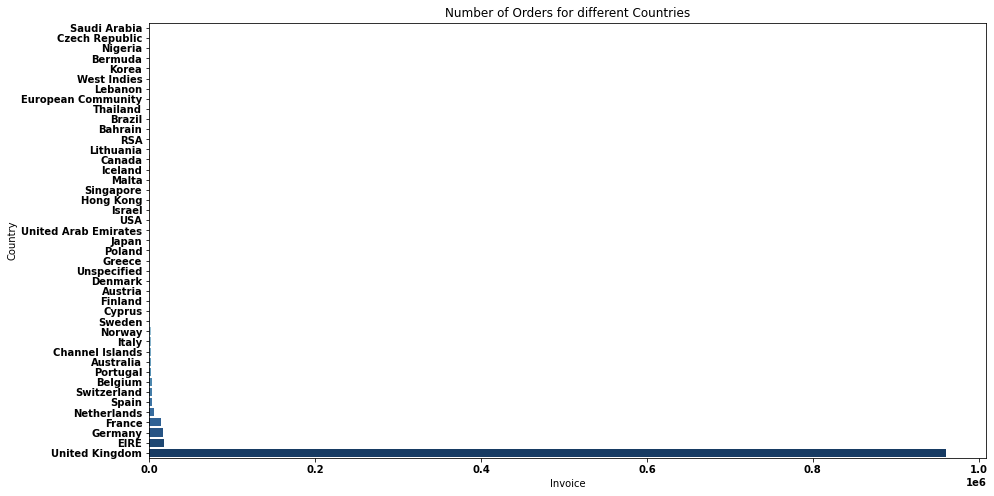

In [27]:
group_orders_by_country = clean_df.groupby('Country')['Invoice'].count().sort_values()

plt.figure(figsize=(15,8))

sns.barplot(x=group_orders_by_country,y=group_orders_by_country.index, palette='RdBu')

plt.title('Number of Orders for different Countries')
plt.show()

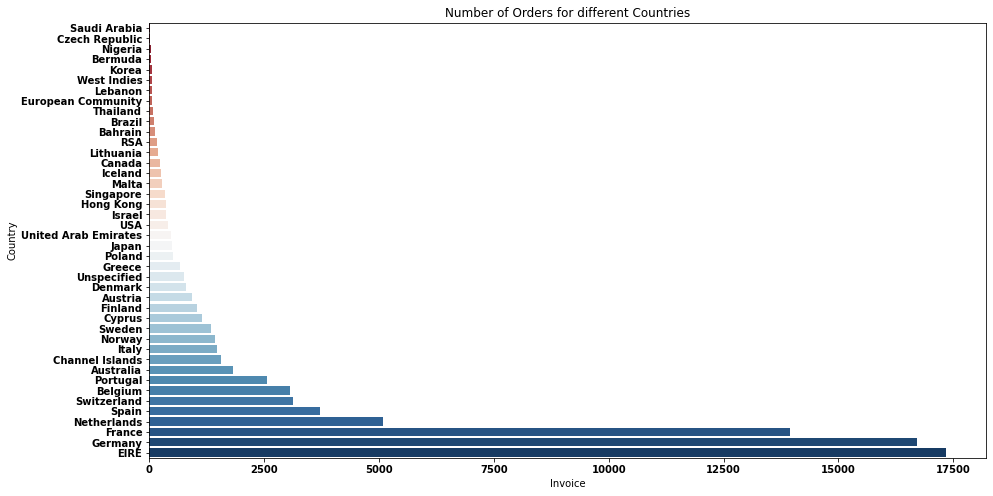

In [28]:
group_orders_by_country = clean_df.groupby('Country')['Invoice'].count().sort_values()
del group_orders_by_country['United Kingdom'] 

plt.figure(figsize=(15,8))

sns.barplot(x=group_orders_by_country,y=group_orders_by_country.index, palette='RdBu')

plt.title('Number of Orders for different Countries')
plt.show()

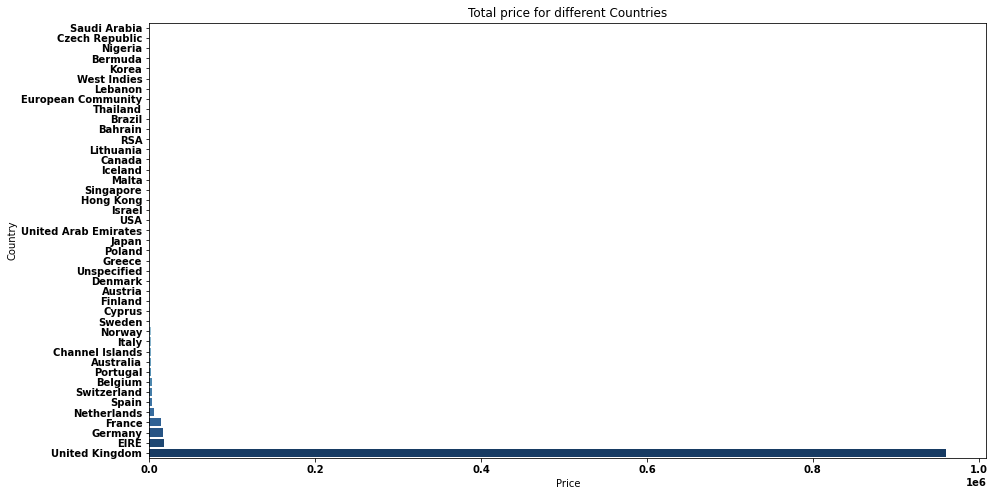

In [29]:
group_orders_by_country = clean_df.groupby('Country')['Price'].count().sort_values()

plt.figure(figsize=(15,8))

sns.barplot(x=group_orders_by_country,y=group_orders_by_country.index, palette='RdBu')

plt.title('Total price for different Countries')
plt.show()

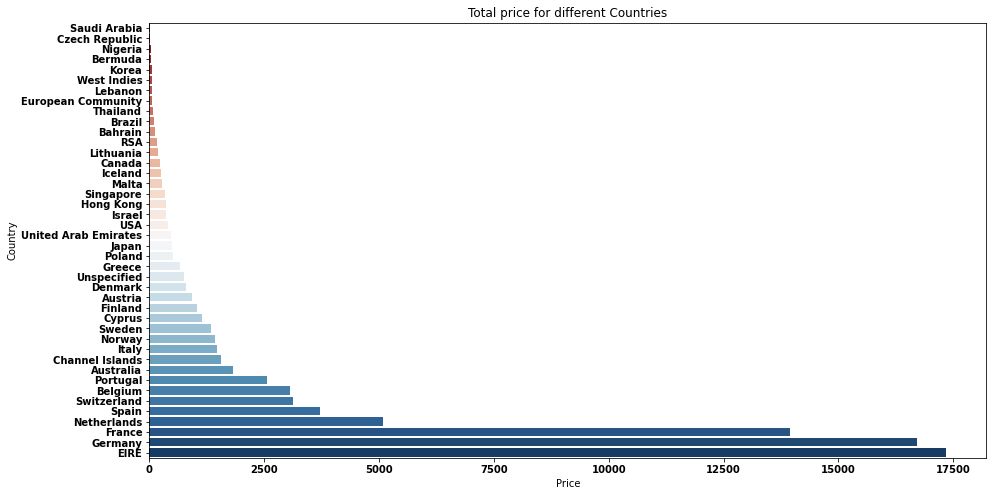

In [30]:
group_orders_by_country = clean_df.groupby('Country')['Price'].count().sort_values()
del group_orders_by_country['United Kingdom'] 

plt.figure(figsize=(15,8))

sns.barplot(x=group_orders_by_country,y=group_orders_by_country.index, palette='RdBu')

plt.title('Total price for different Countries')
plt.show()

# Creating Year_month, Month, Day, Hour columns from DateTime

In [31]:
clean_df.insert(loc=2, column='Year_Month', value=clean_df['InvoiceDate'].map(lambda x: 100*x.year + x.month))
clean_df.insert(loc=3, column='Month', value=clean_df.InvoiceDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
clean_df.insert(loc=4, column='Day', value=(clean_df.InvoiceDate.dt.dayofweek)+1)
clean_df.insert(loc=5, column='Hour', value=clean_df.InvoiceDate.dt.hour)

In [32]:
clean_df.head()

,Invoice,StockCode,Year_Month,Month,Day,Hour,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price
0,489434,85048,200912,12,2,7,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,200912,12,2,7,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,200912,12,2,7,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,200912,12,2,7,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,200912,12,2,7,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [33]:
clean_df['Week'] = clean_df['InvoiceDate'].apply(lambda x: x.strftime('%W'))

clean_df.head()

,Invoice,StockCode,Year_Month,Month,Day,Hour,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price,Week
0,489434,85048,200912,12,2,7,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40,48
1,489434,79323P,200912,12,2,7,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,48
2,489434,79323W,200912,12,2,7,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00,48
3,489434,22041,200912,12,2,7,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80,48
4,489434,21232,200912,12,2,7,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00,48


In [34]:
clean_df.rename(index=str, columns={'Day':'Weekday'}, inplace=True)

In [35]:
clean_df['Day'] = clean_df['InvoiceDate'].apply(lambda x: x.strftime('%d'))


In [36]:
cols = list(clean_df.columns.values)
print(cols)

['Invoice', 'StockCode', 'Year_Month', 'Month', 'Weekday', 'Hour', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Total_Price', 'Week', 'Day']


In [37]:
clean_df = clean_df[['Invoice', 'StockCode', 'Year_Month', 'Month', 'Week', 'Day', 'Weekday', 'Hour', 'Description', 'Quantity', 'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Total_Price']
]

#### Frequency of orders by Year_month

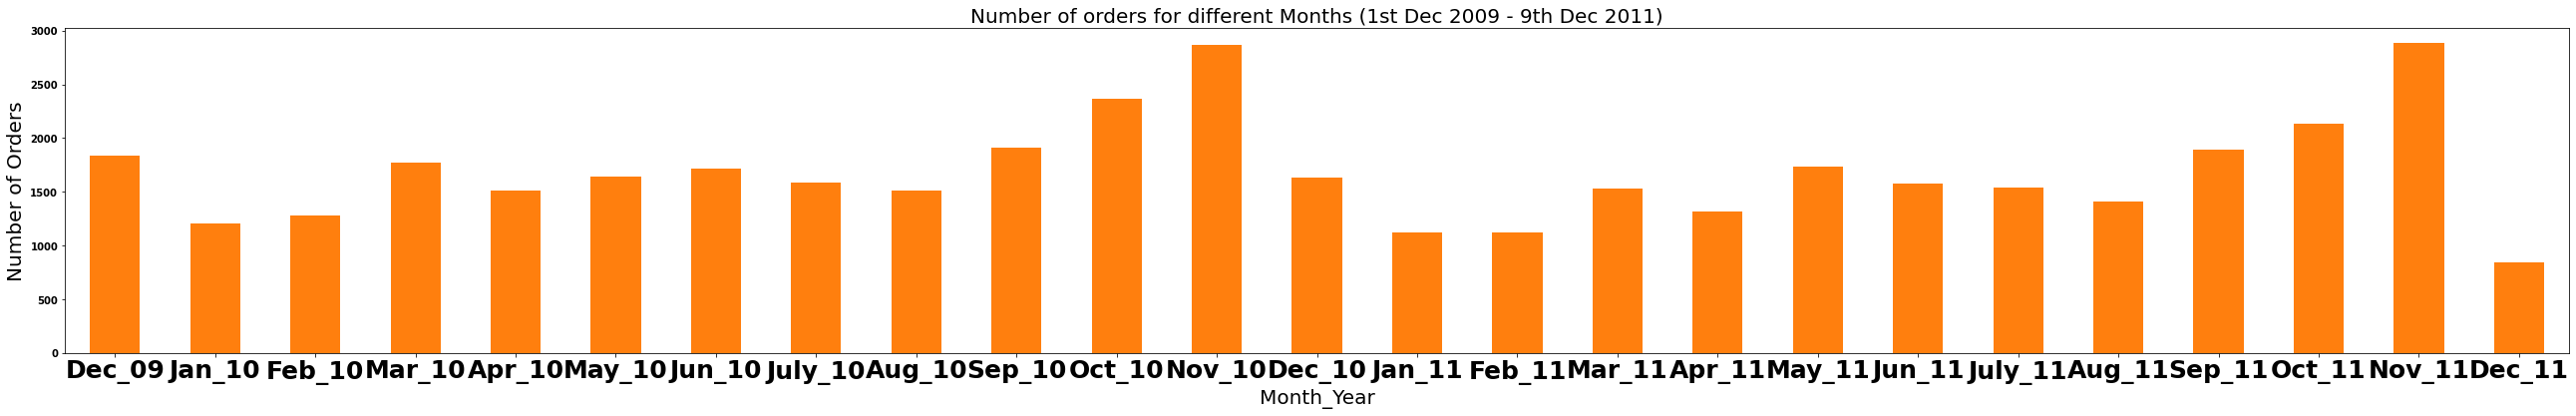

In [38]:
ax = clean_df.groupby('Invoice')['Year_Month'].unique().value_counts().sort_index().plot(kind = 'bar',figsize=(45,6), color = color[1])
ax.set_xlabel('Month_Year',fontsize=20)
ax.set_ylabel('Number of Orders',fontsize=20)
ax.set_title('Number of orders for different Months (1st Dec 2009 - 9th Dec 2011)',fontsize=20)
ax.set_xticklabels(('Dec_09','Jan_10','Feb_10','Mar_10','Apr_10','May_10','Jun_10','July_10','Aug_10','Sep_10','Oct_10','Nov_10','Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=25)
plt.show()



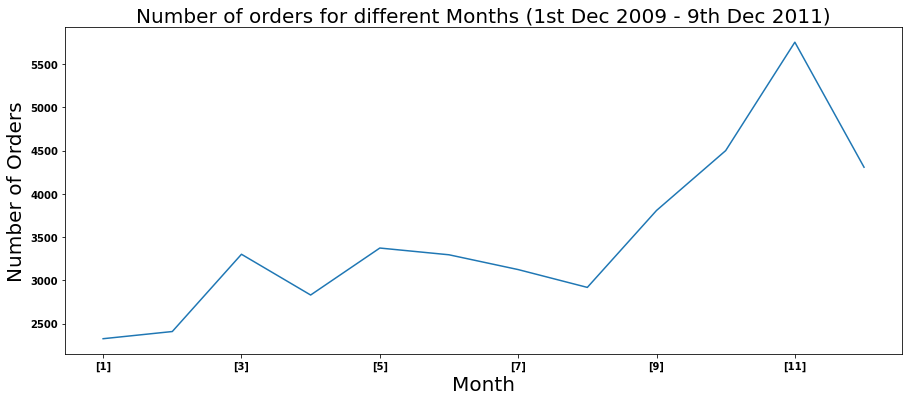

In [39]:
ax = clean_df.groupby('Invoice')['Month'].unique().value_counts().sort_index().plot(kind = 'line',figsize=(15,6))
ax.set_xlabel('Month',fontsize=20)
ax.set_ylabel('Number of Orders',fontsize=20)
ax.set_title('Number of orders for different Months (1st Dec 2009 - 9th Dec 2011)',fontsize=20)
#ax.set_xticklabels(('Dec_09','Jan_10','Feb_10','Mar_10','Apr_10','May_10','Jun_10','July_10','Aug_10','Sep_10','Oct_10','Nov_10','Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=25)
plt.show()

## The most popular month of the year is November

In [40]:
#No of orders per day
clean_df.head()

,Invoice,StockCode,Year_Month,Month,Week,Day,Weekday,Hour,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total_Price
0,489434,85048,200912,12,48,01,2,7,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,200912,12,48,01,2,7,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,200912,12,48,01,2,7,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,200912,12,48,01,2,7,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,200912,12,48,01,2,7,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


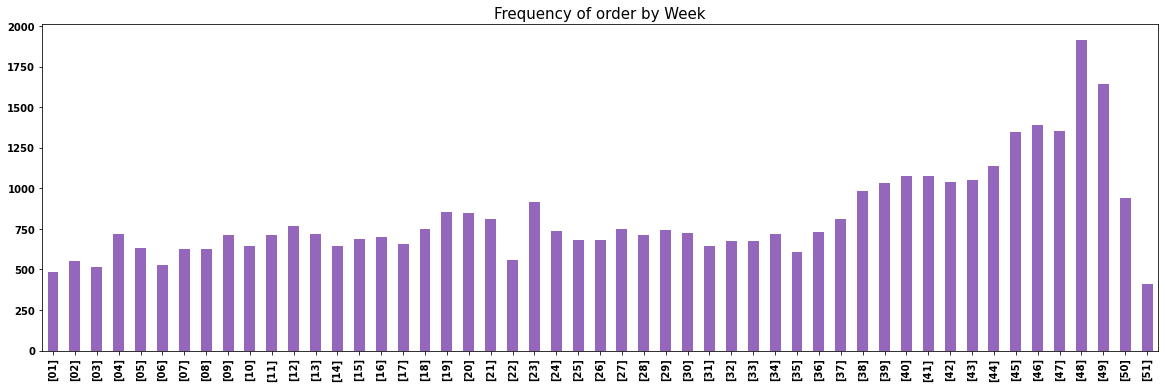

In [41]:
#number of invoices per week, 49th week has the highest number of invoices
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Week", fontsize=15)
InvoiceDate = clean_df.groupby(['Invoice'])['Week'].unique()
ax = InvoiceDate.value_counts().sort_index().plot(kind = 'bar',figsize=(20,6), color = color[4])
plt.show()

In [42]:
clean_df['Day'].unique()


array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '13', '14', '15', '16', '17', '18', '20', '21', '22', '23', '12',
       '19', '24', '25', '26', '27', '28', '29', '31', '30'], dtype=object)

<AxesSubplot:title={'center':'Frequency of order by Day'}>

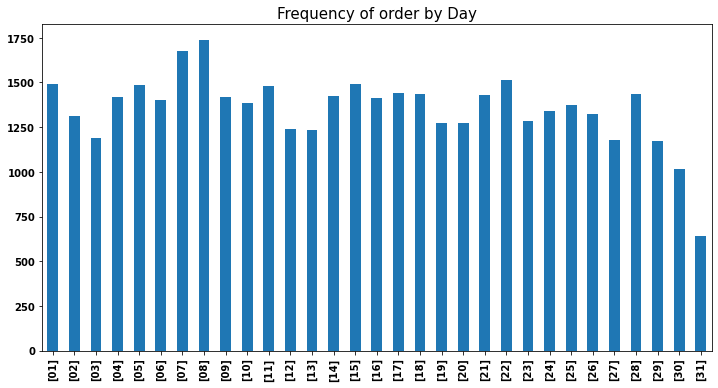

In [43]:
#frequency of orders by day of the month
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Day", fontsize=15)
InvoiceDate = clean_df.groupby(['Invoice'])['Day'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()

#### We can see that no orders were made on a Saturday

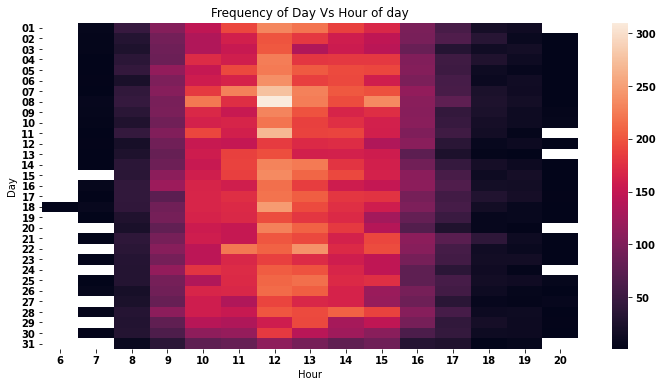

In [44]:
#grouping Invoice by Day and Hour and plotting it on a heatmap
grouped_df  = clean_df.groupby(["Day", "Hour"])["Invoice"].unique().reset_index()
grouped_df["Invoice"] = grouped_df["Invoice"].apply(len)

grouped_df = grouped_df.pivot('Day', 'Hour', 'Invoice')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day Vs Hour of day")
plt.show()

### This shows that people tend to order mostly around 11am to 2pm , this must be because of the lunch hours free time 

<AxesSubplot:title={'center':'Frequency of order by Weekday'}>

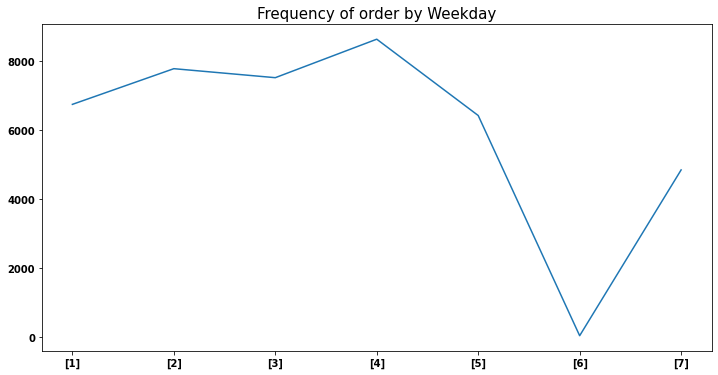

In [45]:
#frequency of orders by days of the week
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Weekday", fontsize=15)
InvoiceDate = clean_df.groupby(['Invoice'])['Weekday'].unique()
InvoiceDate.value_counts().sort_index().plot.line()


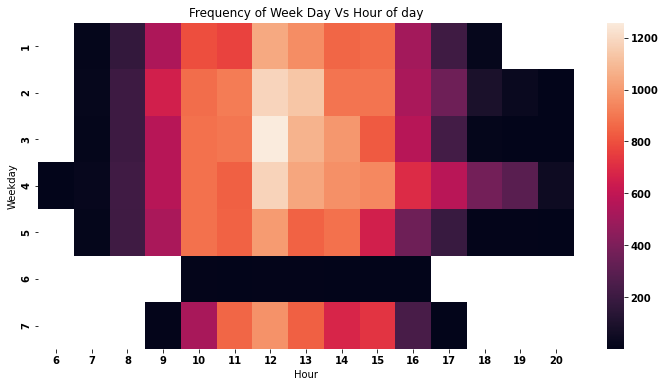

In [46]:
#grouping Invoice by Day and Hour and plotting it on a heatmap
grouped_df_2  = clean_df.groupby(["Weekday", "Hour"])["Invoice"].unique().reset_index()
grouped_df_2["Invoice"] = grouped_df_2["Invoice"].apply(len)

grouped_df_2 = grouped_df_2.pivot('Weekday', 'Hour', 'Invoice')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df_2)
plt.title("Frequency of Week Day Vs Hour of day")
plt.show()

# Now we will look for patterns in the Price of a product

In [47]:
#removing all the rows with negative price

In [48]:
clean_df = clean_df.loc[(clean_df['Price'] >= 0)]

In [49]:
clean_df.Price.describe()


count   1044416.00
mean          4.07
std          51.38
min           0.00
25%           1.25
50%           2.10
75%           4.13
max       25111.09
Name: Price, dtype: float64

In [50]:
#minimum price of a product is zero , this means many items must have been sold for free

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


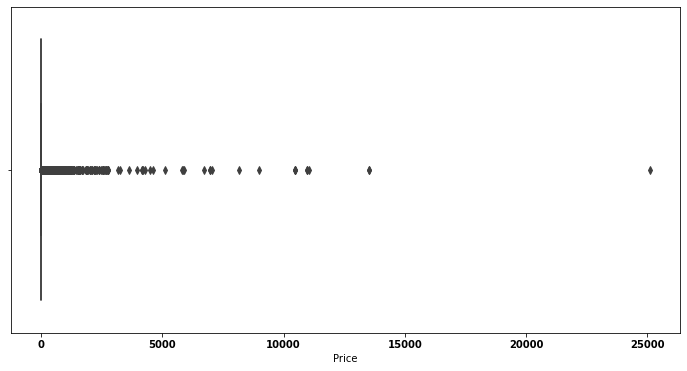

In [51]:
# check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(clean_df.Price)
plt.show()


In [52]:
free_items = clean_df.loc[(clean_df['Price'] == 0)]


In [53]:
#there are 2674 items which have ) price and don't have a customer id assigned to them
free_items['Customer ID'].isnull().sum()

2674

In [54]:
#removing those items
free_items = free_items[free_items['Customer ID'].notna()]

In [55]:
#there were 71 transactions with free items
len(free_items)

71

In [56]:
free_items.Year_Month.value_counts().sort_index()


200912     7
201001     3
201002     2
201003     1
201004     3
201006     3
201007     1
201008     1
201009     3
201010     2
201011     4
201012     4
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: Year_Month, dtype: int64

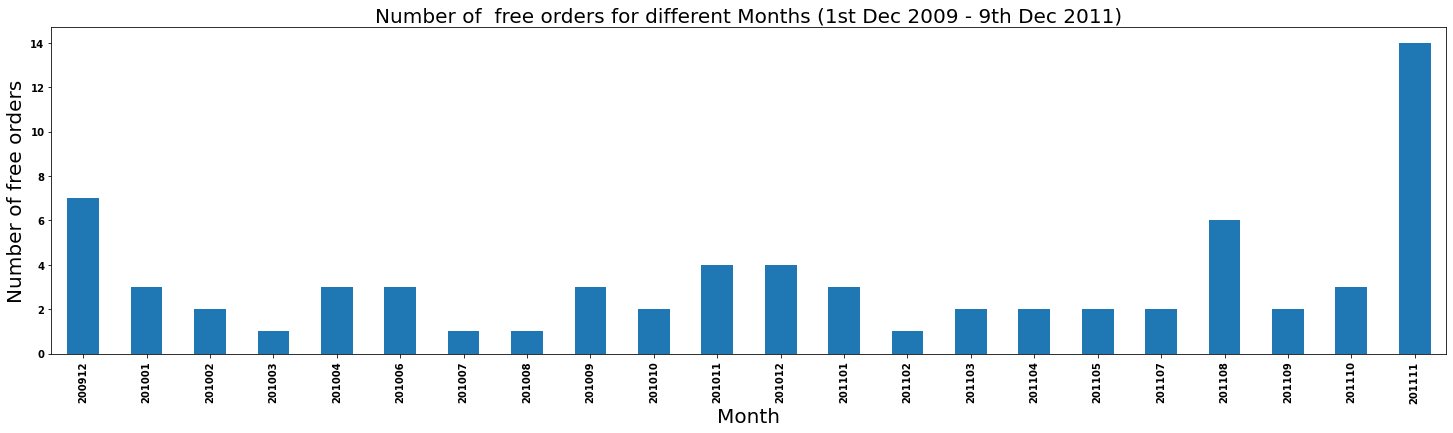

In [57]:
ax = free_items.Year_Month.value_counts().sort_index().plot(kind = 'bar',figsize=(25,6), color=color[0])
ax.set_xlabel('Month',fontsize=20)
ax.set_ylabel('Number of free orders',fontsize=20)
ax.set_title('Number of  free orders for different Months (1st Dec 2009 - 9th Dec 2011)',fontsize=20)
#ax.set_xticklabels(('Dec_09','Jan_10','Feb_10','Mar_10','Apr_10','May_10','Jun_10','July_10','Aug_10','Sep_10','Oct_10','Nov_10','Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=25)
plt.show()

### It is not clear why there are FREE items given to certain customers
### so the Store gave away maximum no of free items on the month of November 2011
### The company gave out 2-4 times FREE items to customers each month (Except in June 2011) on average.


In [58]:
clean_df.shape

(1044416, 15)

In [59]:
df_products = pd.DataFrame(clean_df['Description'].unique()).rename(columns = {0:'Description'})

In [60]:
df_products.head()

,Description
0,15CM CHRISTMAS GLASS BALL 20 LIGHTS
1,PINK CHERRY LIGHTS
2,WHITE CHERRY LIGHTS
3,"RECORD FRAME 7"" SINGLE SIZE"
4,STRAWBERRY CERAMIC TRINKET BOX


In [61]:
for i in df_products['Description'][0:10]:
    print(i)
print(type(i))

15CM CHRISTMAS GLASS BALL 20 LIGHTS
PINK CHERRY LIGHTS
 WHITE CHERRY LIGHTS
RECORD FRAME 7" SINGLE SIZE 
STRAWBERRY CERAMIC TRINKET BOX
PINK DOUGHNUT TRINKET POT 
SAVE THE PLANET MUG
FANCY FONT HOME SWEET HOME DOORMAT
CAT BOWL 
DOG BOWL , CHASING BALL DESIGN
<class 'str'>


In [62]:
import nltk
is_noun = lambda pos: pos[:2] == 'NN'

"""function to extract the keywords(nouns) from the description column of the dataframe"""
def keywords_inventory(dataframe, column = 'Description'):

    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in df_products[column][:]:
        if pd.isnull(s): continue
        #print(type(s))
        if type(s) == str:
            #print(s)
            lines = s.lower()
            tokenized = nltk.word_tokenize(lines)
            nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 

        for t in nouns:
            t = t.lower() ; 
            root = stemmer.stem(t)
            if root in keywords_roots:                
                keywords_roots[root].add(t)
                count_keywords[root] += 1                
            else:
                keywords_roots[root] = {t}
                count_keywords[root] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    key = k ; min_length = len(k)            
            category_keys.append(key)
            keywords_select[s] = key
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]

    print("Nb of keywords in variable '{}': {}".format(column,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [63]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)

Nb of keywords in variable 'Description': 1829


In [64]:
#type(df_products['Description'])
#df_products['Description'][3921]

In [65]:
keywords_roots['decor']

{'decoration', 'decorations', 'decorative'}

In [66]:
len(keywords)

1829

In [67]:
s = {'g', 'e', 'e', 'k', 's'}
t = 'm'
  
# adding tuple t to set s.
s.add(t)
  
print(s)

{'k', 'e', 'm', 's', 'g'}


In [68]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

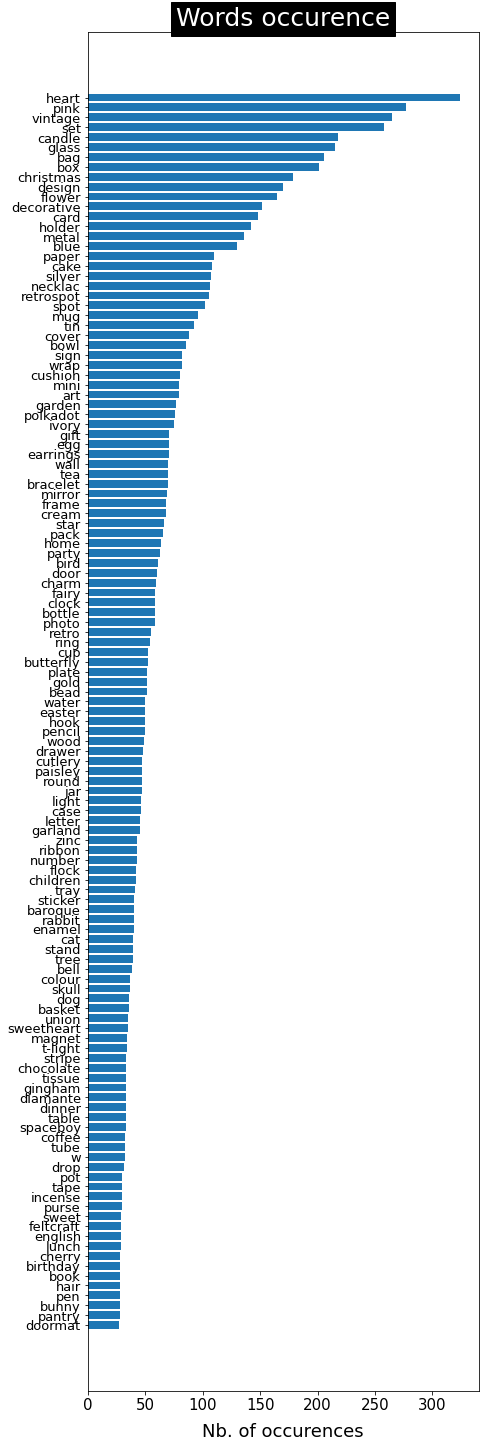

In [69]:
"""Shows the occurences of the keywords"""
liste = sorted(list_products, key = lambda x:x[1], reverse = True)
#_______________________________
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
#_______________________________________________________________________________________
plt.title("Words occurence",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

In [70]:
irr_words = [w for w, v in count_keywords.items() if len(w) < 3 or v < 15 ]
len(irr_words)

1596

## 1596 keywords found with most frequent keywords occuring more than 200 times (products) 
###### Some keywords don't give out much info for example : colours like red, green blue etc


In [71]:
keywords_list = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'w', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    keywords_list.append([word, v])
    
keywords_list.sort(key = lambda x:x[1], reverse = True)
print('Preserved Key Words:', len(keywords_list))

Preserved Key Words: 264


In [72]:
keywords_list[0:10]

[['heart', 324],
 ['vintage', 265],
 ['set', 258],
 ['candle', 218],
 ['glass', 215],
 ['bag', 206],
 ['box', 201],
 ['christmas', 179],
 ['design', 170],
 ['flower', 165]]

# Exploratory DATA ANALYSIS conclusion


In [73]:
products_list = pd.DataFrame(clean_df['Description'].unique())
products_list.dropna(inplace = True)
products_list.reset_index(drop = True, inplace = True)
#products_list = products_list[0].apply(lambda x : x if type(x) == str)

In [74]:
products_list[0].apply(type).value_counts()

<class 'str'>    5468
<class 'int'>       1
Name: 0, dtype: int64

In [75]:
products_list[0][3921]

22719

In [76]:
products_list = products_list.drop(products_list.index[3921])
products_list.reset_index(drop = True, inplace = True)

In [77]:
type(products_list)

pandas.core.frame.DataFrame

## One hot encoding the Descriptions of products according to the keywords and creating a sparse matrix of shape 5468 x 263

In [78]:
X = pd.DataFrame()
for key, occurence in keywords_list:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), products_list[0][:]))


In [79]:
X.shape

(5468, 264)

# Creating clusters from the current one hot encoded X matrix

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

matrix = X.to_numpy()
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.11852579289516778
For n_clusters = 4 The average silhouette_score is : 0.12782313984802404
For n_clusters = 5 The average silhouette_score is : 0.07730052007492631
For n_clusters = 6 The average silhouette_score is : 0.12093649208168215
For n_clusters = 7 The average silhouette_score is : 0.08674230900128639
For n_clusters = 8 The average silhouette_score is : 0.09602236715977268
For n_clusters = 9 The average silhouette_score is : 0.10500607304702812


In [81]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.1160:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.11652081217168393


In [82]:
#The clusters are very unbalanced
pd.Series(clusters).value_counts()


1    4225
4     528
0     314
2     286
3     115
dtype: int64

### Code taken from the sklearn documentation to have an insight on the quality of classification

In [83]:
from sklearn.metrics import silhouette_samples
import matplotlib as mpl
import matplotlib.cm as cm
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  


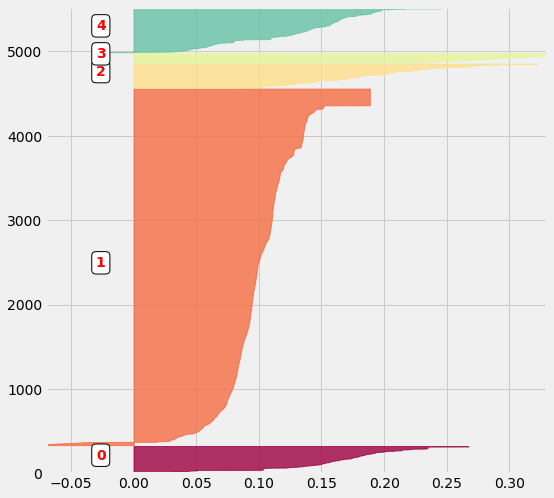

In [84]:
#____________________________________
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(matrix, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

In [85]:
liste = pd.DataFrame(products_list)
liste_words = [word for (word, occurence) in keywords_list]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))


In [ ]:
occurence

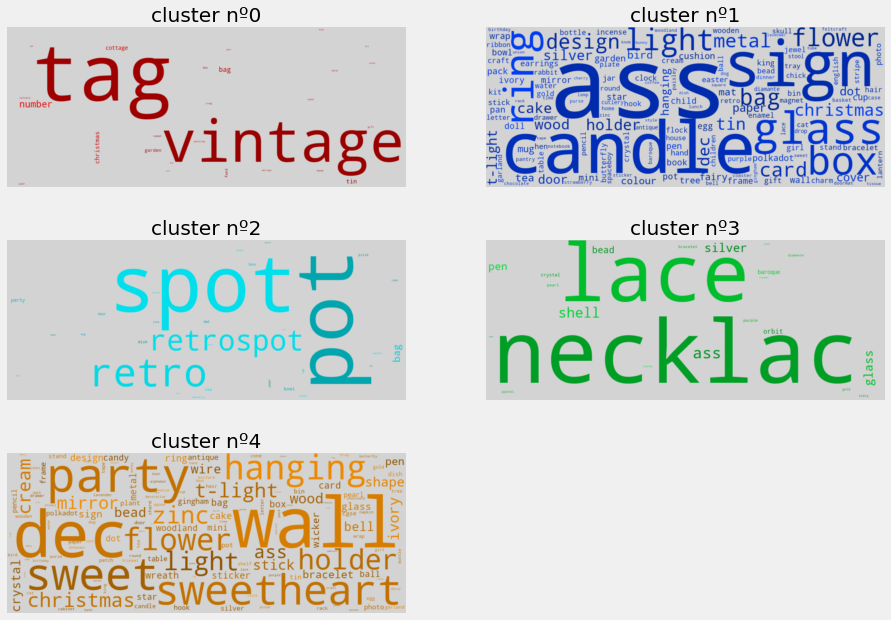

In [87]:
from wordcloud import WordCloud, STOPWORDS
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]

    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))

fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1) 

# As it can be clearly seen from the Word Clouds above that the clusters are highly imbalanced , we have to introduce new features in the X matrix to solve this problem

### In retail dataset analysis and segmentation projects it has been observed that introducing "Price Ranges" has solved this problem in many cases so that is what i will do

# Introducing price ranges in X matrix

In [ ]:
#price_ranges are in range of 'Price' column values
#this loop creates new price range columns according to the prices range list below
price_ranges = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(price_ranges)):
    if i == len(price_ranges)-1:
        col = '.>{}'.format(price_ranges[i])
    else:
        col = '{}<.<{}'.format(price_ranges[i],price_ranges[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

#This code calculates the mean price of the products having the same description, and assigning a 1 to the price ranges feature 
#where the mean lies
for i, prod in enumerate(products_list[0]):
    mean_price = clean_df[ clean_df['Description'] == prod ]['Price'].mean()
    print("mean price of all products: {}".format(mean_price))
    j = 0
    while mean_price > price_ranges[j]:
        j+=1
        if j == len(price_ranges): break
    print(j)
    X.loc[i, label_col[j-1]] = 1

In [89]:
X.columns

Index(['heart', 'vintage', 'set', 'candle', 'glass', 'bag', 'box', 'christmas',
       'design', 'flower',
       ...
       'album', 'spring', 'plant', 'point', '0<.<1', '1<.<2', '2<.<3', '3<.<5',
       '5<.<10', '.>10'],
      dtype='object', length=270)

In [ ]:
X.head(200)

In [91]:
clean_df.columns

Index(['Invoice', 'StockCode', 'Year_Month', 'Month', 'Week', 'Day', 'Weekday',
       'Hour', 'Description', 'Quantity', 'InvoiceDate', 'Price',
       'Customer ID', 'Country', 'Total_Price'],
      dtype='object')

In [92]:
#Checking number of products in different price categories
print("{:<8} {:<20} \n".format('range', 'number of products') + 20*'-')
for i in range(len(price_ranges)):
    if i == len(price_ranges)-1:
        col = '.>{}'.format(price_ranges[i])
    else:
        col = '{}<.<{}'.format(price_ranges[i],price_ranges[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

range    number of products   
--------------------
0<.<1       835                 
1<.<2       1352                
2<.<3       959                 
3<.<5       1012                
5<.<10      873                 
.>10        437                 


## Now the products are fairly balanced after creating their price ranges

# Now creating clusters of products

In [93]:

matrix = X.to_numpy()
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.08410135999673475
For n_clusters = 4 The average silhouette_score is : 0.10029628212903159
For n_clusters = 5 The average silhouette_score is : 0.12137599662724384
For n_clusters = 6 The average silhouette_score is : 0.11266482662068703
For n_clusters = 7 The average silhouette_score is : 0.11825973304988441
For n_clusters = 8 The average silhouette_score is : 0.11665215073502176
For n_clusters = 9 The average silhouette_score is : 0.10920447818792471


#### These clusters are almost the same

In [94]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.08:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0)
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.12137599662724384


In [95]:
pd.Series(clusters).value_counts()


1    1352
2    1310
4    1012
3     959
0     835
dtype: int64

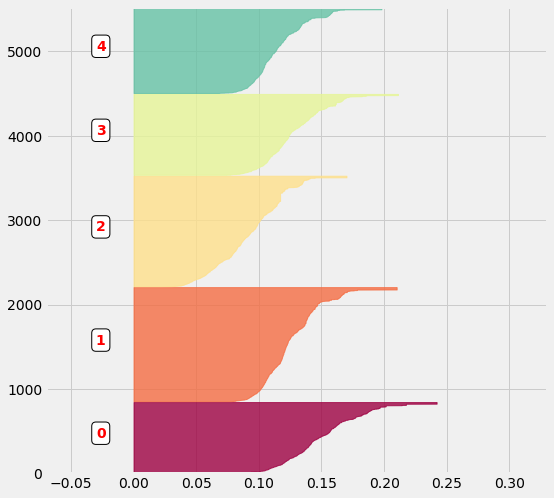

In [96]:
#____________________________________
# define individual silouhette scores
sample_silhouette_values_with_price = silhouette_samples(matrix, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values_with_price, clusters)

In [97]:
description_liste = pd.DataFrame(products_list)
keywords = [word for (word, occurence) in keywords_list]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = description_liste.loc[clusters == i]
    for word in keywords:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))


In [ ]:
occurence


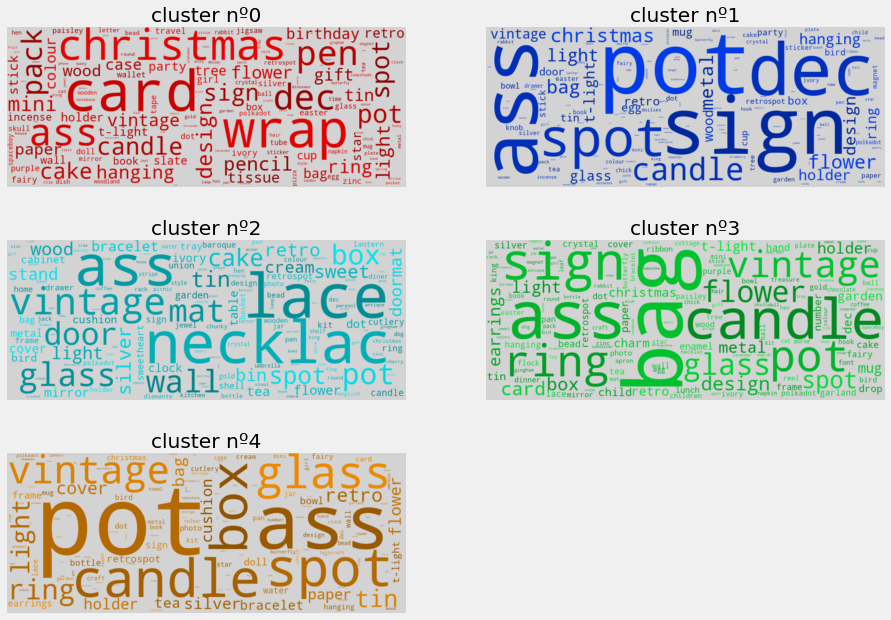

In [99]:
#Creating word clouds

fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] # define the color of the words
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1) 

#### These clusters are far better than the clusters obtained from the matrix which did not have price ranges

### From this representation, we can see that for example, one of the clusters contains objects that could be associated with gifts (keywords: Christmas, packaging, card, ...). Another cluster would rather contain luxury items and jewelry (keywords: necklace, bracelet, lace, silver, ...). Nevertheless, it can also be observed that many words appear in various clusters and it is therefore difficult to clearly distinguish them.



# Principal Component Analysis.

#### In order to ensure that these clusters are truly distinct, I look at their composition. Given the large number of variables of the initial matrix, I first perform a PCA:

In [100]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

In [101]:
# Let us look at the variance produced by each component 

C:\Users\sahil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


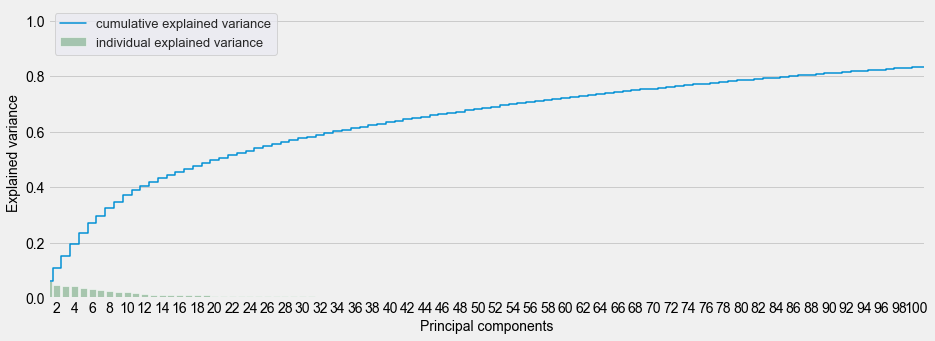

In [102]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='cumulative explained variance')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='individual explained variance')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Explained variance', fontsize = 14)
plt.xlabel('Principal components', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

In [103]:
#We see that the number of components required to explain the data is extremely important:we need more than 100 components
#to explain 90% of the variance of the data. In practice, I decide to keep only a limited number of components
#since this decomposition is only performed to visualize the data:

In [104]:
pca = PCA(n_components=50)
matrix_50 = pca.fit_transform(matrix)
mat = pd.DataFrame(matrix_50)
mat['cluster'] = pd.Series(clusters)

In [ ]:
mat[1]

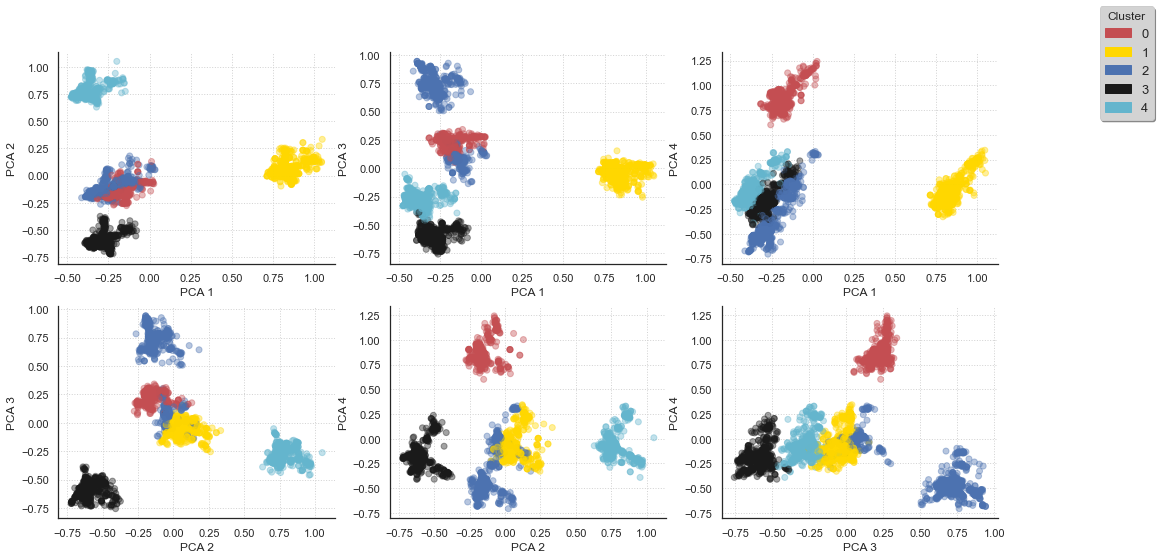

In [106]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (15,8))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 4):    
        increment += 1
        ax = fig.add_subplot(2,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.4) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        

comp_handler = []
for i in range(5):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.show()

### In the previous section, the different products were grouped in five clusters. In order to prepare the rest of the analysis, a first step consists in introducing this information into the dataframe. To do this, I create the categorical variable "product_category" where I indicate the cluster of each product :

In [107]:

corresp = dict()
for key, val in zip (products_list[0], clusters):
    corresp[key] = val 

clean_df['product_category'] = clean_df.loc[:, 'Description'].map(corresp)

In [108]:
clean_df.columns

Index(['Invoice', 'StockCode', 'Year_Month', 'Month', 'Week', 'Day', 'Weekday',
       'Hour', 'Description', 'Quantity', 'InvoiceDate', 'Price',
       'Customer ID', 'Country', 'Total_Price', 'product_category'],
      dtype='object')

In [ ]:
products_list

In [110]:
clean_df = clean_df[~clean_df.index.duplicated()]

In [111]:
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = clean_df[clean_df['product_category'] == i]
    price_temp = df_temp['Price'] * (df_temp['Quantity'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    clean_df.loc[:, col] = price_temp
    clean_df[col].fillna(0, inplace = True)

In [112]:
#clean_df.columns.is_unique

#clean_df[clean_df.index.duplicated()]

In [113]:
#clean_df.drop(['categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4'],  axis = 1, inplace = True)

In [114]:
clean_df.head(20)

,Invoice,StockCode,Year_Month,Month,Week,Day,Weekday,Hour,Description,Quantity,...,Price,Customer ID,Country,Total_Price,product_category,categ_0,categ_1,categ_2,categ_3,categ_4
0,489434,85048,200912,12,48,01,2,7,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,...,6.95,13085.00,United Kingdom,83.40,2.00,0.00,0.00,83.40,0.00,0.00
1,489434,79323P,200912,12,48,01,2,7,PINK CHERRY LIGHTS,12,...,6.75,13085.00,United Kingdom,81.00,2.00,0.00,0.00,81.00,0.00,0.00
2,489434,79323W,200912,12,48,01,2,7,WHITE CHERRY LIGHTS,12,...,6.75,13085.00,United Kingdom,81.00,2.00,0.00,0.00,81.00,0.00,0.00
3,489434,22041,200912,12,48,01,2,7,"RECORD FRAME 7"" SINGLE SIZE",48,...,2.10,13085.00,United Kingdom,100.80,4.00,0.00,0.00,0.00,0.00,100.80
4,489434,21232,200912,12,48,01,2,7,STRAWBERRY CERAMIC TRINKET BOX,24,...,1.25,13085.00,United Kingdom,30.00,1.00,0.00,30.00,0.00,0.00,0.00
5,489434,22064,200912,12,48,01,2,7,PINK DOUGHNUT TRINKET POT,24,...,1.65,13085.00,United Kingdom,39.60,3.00,0.00,0.00,0.00,39.60,0.00
6,489434,21871,200912,12,48,01,2,7,SAVE THE PLANET MUG,24,...,1.25,13085.00,United Kingdom,30.00,1.00,0.00,30.00,0.00,0.00,0.00
7,489434,21523,200912,12,48,01,2,7,FANCY FONT HOME SWEET HOME DOORMAT,10,...,5.95,13085.00,United Kingdom,59.50,2.00,0.00,0.00,59.50,0.00,0.00
8,489435,22350,200912,12,48,01,2,7,CAT BOWL,12,...,2.55,13085.00,United Kingdom,30.60,3.00,0.00,0.00,0.00,30.60,0.00
9,489435,22349,200912,12,48,01,2,7,"DOG BOWL , CHASING BALL DESIGN",12,...,3.75,13085.00,United Kingdom,45.00,4.00,0.00,0.00,0.00,0.00,45.00


## Up to now, the information related to a single order was split over several lines of the dataframe (one line per product). I decide to collect the information related to a particular order and put in in a single entry. I therefore create a new dataframe that contains, for each order, the amount of the basket, as well as the way it is distributed over the 5 categories of products:

In [115]:
#____________________________________________________________

# Creating basket price which will store sum of all the purchases made by a customer across different invoices
# made by his/her orders
temp = clean_df.groupby(by=['Customer ID', 'Invoice'], as_index=False)['Total_Price'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})
#____________________________________________________________



In [116]:

# percentage of order price / product category
for i in range(5):
    col = 'categ_{}'.format(i) 
    temp = clean_df.groupby(by=['Customer ID', 'Invoice'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp[col]
#____________________________________________________________


In [117]:
#temp.head(100)
basket_price.head()

,Customer ID,Invoice,Total_Price,categ_0,categ_1,categ_2,categ_3,categ_4
0,12346.00,491725,45.00,0.00,0.00,0.00,0.00,45.00
1,12346.00,491742,22.50,0.00,0.00,0.00,0.00,22.50
2,12346.00,491744,22.50,0.00,0.00,0.00,0.00,22.50
3,12346.00,492718,22.50,0.00,0.00,0.00,0.00,22.50
4,12346.00,492722,1.00,0.00,0.00,0.00,0.00,1.00


In [118]:
clean_df.columns

Index(['Invoice', 'StockCode', 'Year_Month', 'Month', 'Week', 'Day', 'Weekday',
       'Hour', 'Description', 'Quantity', 'InvoiceDate', 'Price',
       'Customer ID', 'Country', 'Total_Price', 'product_category', 'categ_0',
       'categ_1', 'categ_2', 'categ_3', 'categ_4'],
      dtype='object')

In [119]:
# Date of the order
clean_df['InvoiceDate_int'] = clean_df['InvoiceDate'].astype('int64')
temp = clean_df.groupby(by=['Customer ID', 'Invoice'], as_index=False)['InvoiceDate_int'].mean()

clean_df.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
#____________________________________________________________


In [120]:

# selection of significant entries:
basket_price = basket_price[basket_price['Total_Price'] > 0]
basket_price.sort_values('Customer ID', ascending = True)[:100]

,Customer ID,Invoice,Total_Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
0,12346.00,491725,45.00,0.00,0.00,0.00,0.00,45.00,2009-12-14 08:34:00.000000000
9,12346.00,499763,27.05,0.00,0.00,23.80,0.00,3.25,2010-03-02 13:08:00.000000000
8,12346.00,495295,22.50,0.00,0.00,0.00,0.00,22.50,2010-01-22 13:30:00.000000000
7,12346.00,494450,22.50,0.00,0.00,0.00,0.00,22.50,2010-01-14 13:50:00.000000000
6,12346.00,493412,22.50,0.00,0.00,0.00,0.00,22.50,2010-01-04 09:53:00.000000000
10,12346.00,513774,142.31,0.00,0.00,142.31,0.00,0.00,2010-06-28 13:53:00.000000256
4,12346.00,492722,1.00,0.00,0.00,0.00,0.00,1.00,2009-12-18 10:55:00.000000000
3,12346.00,492718,22.50,0.00,0.00,0.00,0.00,22.50,2009-12-18 10:47:00.000000000
2,12346.00,491744,22.50,0.00,0.00,0.00,0.00,22.50,2009-12-14 11:02:00.000000000
1,12346.00,491742,22.50,0.00,0.00,0.00,0.00,22.50,2009-12-14 11:00:00.000000000
